In [129]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [2]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=20)
X_pca=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707063, 0.0169402 , 0.01583381,
       0.01486342, 0.01319347, 0.01279009, 0.01187194, 0.01152736])

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='RdPu', interpolation='nearest',
                  clim=(0, 16))


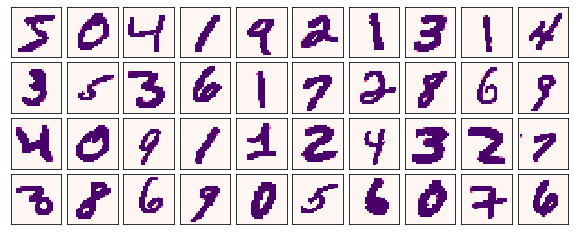

In [87]:
plot_digits(X)

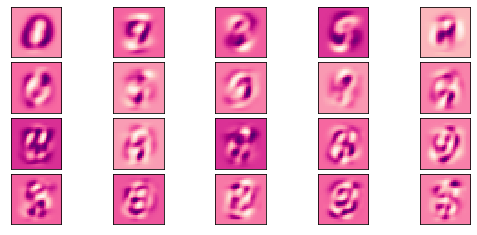

In [83]:
fig, axes = plt.subplots(4,5 , figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='RdPu')

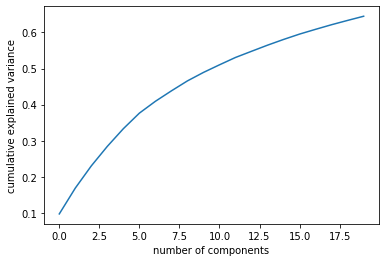

In [84]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

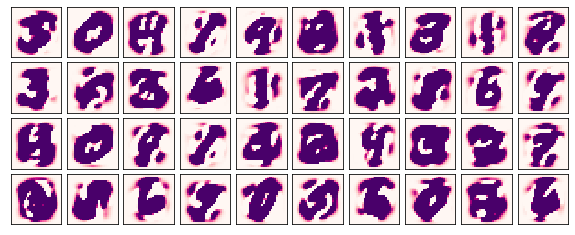

In [88]:
filtered = pca.inverse_transform(X_pca)
plot_digits(filtered)


#   

# LDA

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
lda=LDA(n_components=5)

In [132]:
X_train = lda.fit_transform(X_train, y_train)


In [133]:
y_pred=lda.predict(X_test)

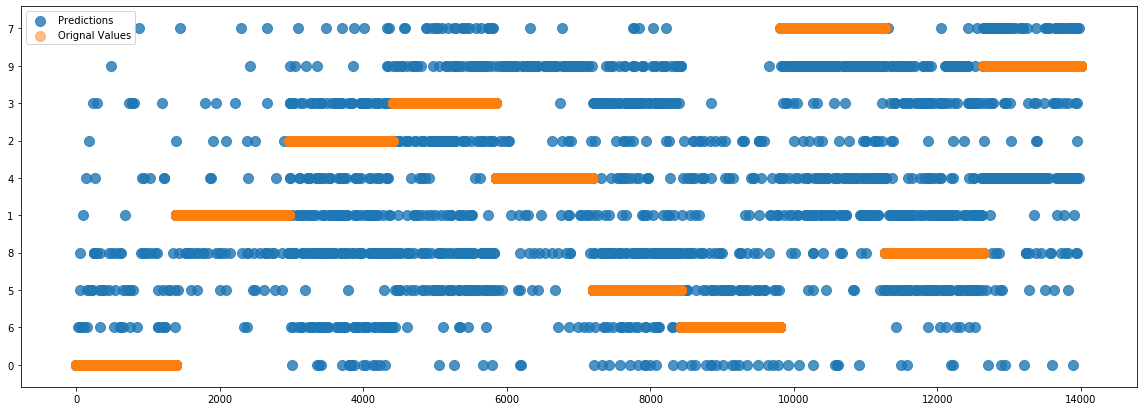

In [134]:

plt.figure(figsize=(20,7))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'w'

plt.scatter(range(len(y_test)), y_pred[idx],label="Predictions",s=100,alpha=0.8)
plt.scatter(range(len(y_test)), y_test[idx],label="Orignal Values",s=100,alpha=0.5)
plt.legend()

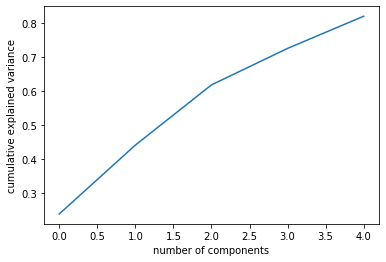

In [135]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [137]:
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)